In [30]:
import numpy as np
import time
import random
import pandas as pd
import matplotlib.pyplot as plt


# Q1.a)  Use this function to find minima for (i) x2 + 3x+4 and (ii) x4 – 3x2 +2x. [5 points]


### 1. $x^2+3x+4$

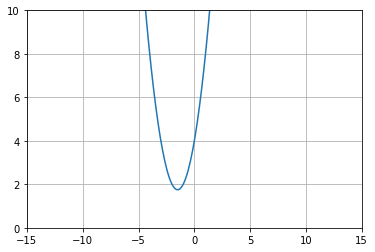

In [31]:
x=np.linspace(-15,15,300)
y=x**2+3*x+4
plt.xlim([-15,15])
plt.ylim([0,10])
plt.grid()

plt.plot(x,y)
plt.show()

## 2. $x^4 - 3x^2 + 2x$

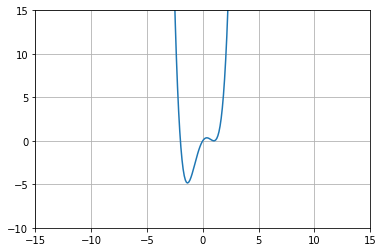

In [32]:
x=np.linspace(-15,15,300)
y=x**4-3*x*x+2*x
plt.xlim([-15,15])
plt.ylim([-10,15])
plt.grid()
plt.plot(x,y)
plt.show()

In [33]:
gradient1 = lambda x: 2*x+3 ## specifies gradient for the function x2 + 3x+4
gradient2 = lambda x: 4*(x**3)-6*x+2 ## specifies gradient for the function  x4 – 3x2 +2x.

def gradient_descent (gradient, init_, learn_rate, n_iter=1000, tol=1e-06):
    x = init_
    for i in range (n_iter): 
        delta = (-1)*learn_rate * gradient(x)
        if np.all(np.abs (delta) <= tol): 
            break 
        x += delta 
    print('Iterations:', str(i+1))
    return  round(x*1000)/1000

x1 = gradient_descent(gradient1,4 , 0.1)
min_func1 = x1**2+3*x1+4
print('Minima for the function x^2+3x+4 is found at '+ str(x1), 'and the minimum value of the function is', str(min_func1))

x2 = gradient_descent(gradient2,-1 , 0.01)
min_func2 = x2**4 - 3*(x2**2) + 2*x2
print('Minima for the function x^4-3x^2+2x is found at '+ str(x2), 'and the minimum value of the function is', str(min_func2))


Iterations: 64
Minima for the function x^2+3x+4 is found at -1.5 and the minimum value of the function is 1.75
Iterations: 66
Minima for the function x^4-3x^2+2x is found at -1.366 and the minimum value of the function is -4.848076206064


## NOTE: The first polynomial is a convex function, so initialisation won't matter a lot. But the second polynomial is a non convex function, and hence the initialization value matters. I tried initialising with the value **~4**, and ended up finding local minima. Finally, the initial value of **~-1** is giving me the global minima.

# Q1.b) Write a gradient function to calculate gradients for a linear regression y = ax + b [10 points]


The gradients w.r.t __a__ and __b__ are calculated as: 
$$\nabla_a = \frac{-2}{n} * \sum(X * (Y - Y_{pred}))$$
$$\nabla_b = \frac{-2}{n} * \sum(Y - Y_pred)$$
<br>

$where, \; Y_{pred} = a\ast X + b$,<br> n = number of points in the dataset, <br>X is the input vector, <br>Y is the output vector 

### The same are used in the function below to elaborate their actual usage:

In [34]:
def calculate_gradients(X, Y):
    Y_pred = a*X + b 
        
    D_a = (-2/n) * np.dot(X.T,(Y - Y_pred)) # gradient wrt a 
    D_b = (-2/n) * sum(Y - Y_pred) # gradient wrt b
    return D_a, D_b

# Q1.c) Generate artificial data for this regression according to the following protocol


In [35]:
# initializing the parameters to be used later
my_iter = 1000
my_tol = 1e-06
my_lr = 0.005

### Here we are trying to generate some artificial data: 

In [36]:
#generating some random data 

np.random.seed (0)
X = 2.5*np.random.randn(10000)+1.5 #Ar
res=1.5*np.random.randn(10000) # Gene.
Y = 2+0.3*X + res

##  Here we are trying to calculate partial derivatives in each iteration, w.r.t to the free parameteres __a__ and __b__. We updated their values based on the learning rate and the gradients calculated, and break the loop under following two scenarios:
### 1. Iterations have equalled to max_iter
### 2. Delta_a and delta_b have dropped below a specified tolerance, $10^{-6}$, in this case

In [37]:
batch_time = 0
def lr_gd(X, Y, learning_rate = my_lr, init_a = 0, init_b = 0, max_iter = my_iter, tol = my_tol):
    start_time = time.time()

    a = 0
    b = 0

    n = X.shape[0] 
    
    for i in range(max_iter): 
        Y_pred = a*X + b 
        
        D_a = (-2/n) * np.dot(X.T,(Y - Y_pred))  
        D_b = (-2/n) * sum(Y - Y_pred)  
        
        delta_a = (-1)*learning_rate * D_a
        delta_b = (-1)*learning_rate * D_b

        if (np.all(np.abs (delta_a) <= tol) & np.all(np.abs (delta_b) <= tol)): 
            break
        
        a+=delta_a
        b+=delta_b
# =============================================================================
#         print(i)
# =============================================================================
    #print('It took ', str(i+1), ' iterations to arrive at the desired result')
    #batch_time = time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    return round(a,2), round(b,2),time.time() - start_time, i+1 

a,b,batch_time, iterations = lr_gd(X, Y)
print('\nUsing batch gradient descent with a learning rate of 0.01, the values of (a,b, execution time, #iterations) are ', (a,b,batch_time, iterations))



Using batch gradient descent with a learning rate of 0.01, the values of (a,b, execution time, #iterations) are  (0.3, 2.02, 1.1576311588287354, 1000)


# Q1.d) Implement minibatch stochastic gradient descent using the code base you have developed so far.[15 points]


## Stochastic- Gradient Descent

In [38]:
def lr_stochastic_gd(X, Y, learning_rate = my_lr, init_a = 0, init_b = 0, max_iter = my_iter, tol = my_tol):
    
    start_time = time.time()
    a = 0
    b = 0

    n = X.shape[0] 
    
    for i in range(max_iter): 
        #np.random.seed (5)
        random_index=np.random.randint(0,n-1)
        X_mini= X[random_index]
        Y_mini = Y[random_index]
        
        Y_pred = a*X_mini + b 

       # print(X_mini, Y_mini)


        D_a = (-2)*X_mini*(Y_mini - Y_pred)  
        D_b = (-2)*(Y_mini - Y_pred)  

        delta_a = (-1)*learning_rate * D_a
        delta_b = (-1)*learning_rate * D_b

        if (np.all(np.abs (delta_a) <= tol) & np.all(np.abs (delta_b) <= tol)): 
            break

        a+=delta_a
        b+=delta_b

# =============================================================================
#         print(i)
# =============================================================================
    #print('It took ', str(i+1), ' iterations to arrive at the desired result')
    #print("--- %s seconds ---" % (time.time() - start_time))
    #print (round(a,2), round(b,2))
    return str(i+1), time.time() - start_time, round(a,2), round(b,2)

## Since there is a large amount of fluctuation in SGD, we will try to run the SGD method multiple times, and stop when we get the values of our free parameters, __a__ and __b__ in our desired range.

> 

In [39]:
for i in range(10000):
    it, exec_time, a,b = lr_stochastic_gd(X, Y)
    print(it, exec_time, a, b)
    if((a in [0.29, 0.3, 0.31]) and (b in [1.99, 2.0, 2.01])):
        break

print(it, exec_time)
sgd_time = exec_time
sgd_iterations = it

1000 0.028056621551513672 0.34 2.0
1000 0.022626399993896484 0.36 1.99
1000 0.022193431854248047 0.47 2.18
1000 0.023459196090698242 0.1 2.01
1000 0.02993941307067871 0.26 2.06
1000 0.023894071578979492 0.42 2.06
1000 0.020761966705322266 0.23 1.93
685 0.025142192840576172 0.35 1.88
1000 0.029018640518188477 0.37 1.97
1000 0.021324634552001953 0.24 1.95
1000 0.02483963966369629 0.11 1.96
1000 0.028622150421142578 0.36 2.11
1000 0.022945642471313477 0.21 2.0
1000 0.024069786071777344 0.29 2.02
1000 0.028271198272705078 0.21 2.27
1000 0.028585433959960938 0.15 1.99
1000 0.022594213485717773 0.31 2.03
1000 0.029275178909301758 0.26 1.98
1000 0.02408885955810547 0.24 2.11
928 0.023853063583374023 0.43 2.07
1000 0.03603529930114746 0.38 2.35
1000 0.023396730422973633 0.33 2.13
1000 0.04725503921508789 0.45 1.97
1000 0.024576902389526367 0.25 2.12
1000 0.021357297897338867 0.27 2.08
1000 0.02375197410583496 0.39 1.98
1000 0.03796720504760742 0.4 1.97
1000 0.038022756576538086 0.38 2.05
1000 

## Here we are creating a function for calculating the LR parameters using Minibatch GD
### Steps:
1. For each iteration, we are sampling the data from our input dataset of size equal to the batch size provided
2. We will calculate the partial derivatives wrt __a__ and __b__
3. We will update the values of __a__ and __b__ and calulate the delta of these params
4. We will check if the delta values so calcuted fall below the pre-decided tolerance level
5. If 4 happens to be true, we will stop and report the values of __a__ and __b__ 
6. If 4 is false, we will iterate till max_iter is reached, and return the values of __a__ and __b__

In [40]:
def lr_mb_gd(X, Y, batch_size, learning_rate = my_lr, init_a = 0, init_b = 0, max_iter = my_iter, tol = my_tol):
    start_time = time.time()
    a = 0
    b = 0

    n = float(len(X)) 
    
    for i in range(max_iter): 
        #np.random.seed (5)
        random_index=np.random.randint(0,n-batch_size-1)
        X_mini= X[random_index:random_index+batch_size]
        Y_mini = Y[random_index:random_index+batch_size]
        
        n_tmp = len(X_mini)
        Y_pred = a*X_mini + b 

        D_a = (-2/n_tmp) * np.dot(X_mini.T,(Y_mini - Y_pred))  
        D_b = (-2/n_tmp) * sum(Y_mini - Y_pred)  

        delta_a = (-1)*learning_rate * D_a
        delta_b = (-1)*learning_rate * D_b

        if (np.all(np.abs (delta_a) <= tol) & np.all(np.abs (delta_b) <= tol)): 
            break

        a+=delta_a
        b+=delta_b

# =============================================================================
#         print(i)
# =============================================================================
    #print('It took ', str(i+1), ' iterations to arrive at the desired result')
    #print("--- %s seconds ---" % (time.time() - start_time))
    #print (round(a,2), round(b,2))
    return str(i+1), time.time() - start_time, round(a,2), round(b,2)

### Now we will calculate the number of iterations, execution time for batch sizes in the range, 
## $$2^1, 2^2\; ..... \; 2^{10}$$

### and try to find the values which give the most optimum values of __a__ and __b__ 

### NOTE: We are iterating over powers of 2 because it is __computationally faster__. Also powers of 2 fit the memory requirements of CPU and GPU

In [41]:
batch_sizes = [2**i for i in range(1,11)]
out = []

for b in batch_sizes:
    #print('batch_size ', str(b))
    tmp = {}
    tmp['batch_size'] = b
    tmp['iterations'], tmp['exec_time'], tmp['a'], tmp['b'] = lr_mb_gd(X, Y, b)
    #print('\n')
    print(tmp)
    out.append(tmp)
df = pd.DataFrame(out)
print(df.head(50))



{'batch_size': 2, 'iterations': '1000', 'exec_time': 0.03710007667541504, 'a': 0.36, 'b': 2.13}
{'batch_size': 4, 'iterations': '1000', 'exec_time': 0.03418135643005371, 'a': 0.28, 'b': 1.98}
{'batch_size': 8, 'iterations': '1000', 'exec_time': 0.04057145118713379, 'a': 0.32, 'b': 1.99}
{'batch_size': 16, 'iterations': '1000', 'exec_time': 0.04764676094055176, 'a': 0.28, 'b': 2.01}
{'batch_size': 32, 'iterations': '1000', 'exec_time': 0.04814934730529785, 'a': 0.24, 'b': 2.01}
{'batch_size': 64, 'iterations': '1000', 'exec_time': 0.042153358459472656, 'a': 0.29, 'b': 2.02}
{'batch_size': 128, 'iterations': '1000', 'exec_time': 0.054213523864746094, 'a': 0.3, 'b': 2.0}
{'batch_size': 256, 'iterations': '1000', 'exec_time': 0.06735849380493164, 'a': 0.29, 'b': 2.03}
{'batch_size': 512, 'iterations': '1000', 'exec_time': 0.10614824295043945, 'a': 0.29, 'b': 2.02}
{'batch_size': 1024, 'iterations': '1000', 'exec_time': 0.15604925155639648, 'a': 0.29, 'b': 2.01}
   batch_size iterations  ex

## As observed, we are getting the most optimal values for a and b using a batch size and time taken(seconds) as under:

In [44]:
mgd_time = df[(df['a'].isin([0.30,0.31,0.29])) & (df['b'].isin([1.99, 2.0, 2.01]))]['exec_time'].min()
mgd_batch_size = list(df[df['exec_time'] == mgd_time]['batch_size'])[0]
mgd_iterations = list(df[df['exec_time'] == mgd_time]['iterations'])[0]

print(mgd_time,mgd_batch_size,mgd_iterations)


0.054213523864746094 128 1000


# Q1.e) Does SGD do better or worse in terms of time performance on our data? Is there an optimal minibatch size that works best? Quantify and interpret your findings.

# Inference: 


In [45]:
print(batch_time, mgd_time, sgd_time)

1.1576311588287354 0.054213523864746094 0.023595809936523438


## With fixed values for parameters like **learn rate = 0.005, and max_iter = 1000**, we can observe the time taken by the above three algorithms as:
## $$Batch\; Gradient\; Descent > MiniBatch\; Gradient\; Descent > Stochastic\; Gradient\; Descent$$ 

## The percentage reduction in execution time of Minibatch GD versus Batch GD is as below:

In [46]:
print('MGD Time_reduction_perc versus Batch GD =',round(((batch_time - mgd_time)/batch_time)*100,2), '%')

MGD Time_reduction_perc versus Batch GD = 95.32 %


## The percentage reduction in execution time of Stochastic GD versus Batch GD is as below:

In [47]:
print('SGD Time_reduction_perc versus Batch GD =',round(((batch_time - sgd_time)/batch_time)*100,2), '%')

SGD Time_reduction_perc versus Batch GD = 97.96 %


## The percentage reduction in execution time of Stochastic GD versus Minibatch GD is as below:

In [48]:
print('SGD Time_reduction_perc versus MGD =',round(((mgd_time - sgd_time)/mgd_time)*100,2), '%')

SGD Time_reduction_perc versus MGD = 56.48 %



<br>
<br>

## The most optimal batch size reported so for for Minibatch Grdadient Descent is:

In [49]:
print(mgd_batch_size)

128


# Q2. Surprise! This problem too builds on a problem that I asked in the mid-sem exam. Consider again this Bayesian network and calculate:


### (i) the probability that someone has both cold and a fever [5 points]


$$ P(cold \cap fever)  = P(fever / cold) * P(cold) 
                       = 0.307*0.02
                       = 0.00614 --------ANS.
$$

### (ii) the probability that someone who has a cough has a cold. [10 points]


$$ P(cold/cough) = P(cough \cap cold)/P(cough) ------- (0)$$

$$P(lungDisease) = P(lungDisease/smokes)*P(smokes) + P(lungDisease/not smokes) * P(not smokes)$$
$$0.2*0.1009 + 0.8*0.001 = 0.02098 -------(1)$$

$$P(cold) = P(lungDisease)*P(cold)*P(cough/lungDisease \cap cold) + P(lungDisease)*P(\overline{cold})*P(cough/lungDisease \cap\overline{cold}) + P(\overline{lungDisease})*P(cold)*P(cough/\overline{lungDisease} \cap cold) + P(\overline{lungDisease})*P(\overline{cold})*P(cough/\overline{lungDisease} \cap \overline{cold}) $$

$$= 0.02098*0.02*0.7525 + 0.02098*0.98*0.505 + 0.97902*0.02*0.505 +  0.97902*0.98*0.01 $$
$$ =0. 000315749 + 0.010383002 + 0.009888102 + 0.009594396 $$
$$ = 0.030181249 \;-------------(2)$$  

$$P(cough \cap cold) = P(lungDisease)*P(cold)*P(cough/lungDisease \cap cold) +  P(\overline{lungDisease})*P(cold)*P(cough/\overline{lungDisease} \cap cold)$$
$$ = 0.02098*0.02*0.7525 + 0.97902*0.02*0.01 = 0.000315749 +0.009888102 = 0.010203851 ------------(3)$$

Putting  (2) and (3) in (0), we get, 
$$0.010203851/0.030181249 = 0.33809------------ANS.$$ 

# Q3. Derive the MLE for the parameters of a k-sided multinomial distribution. [10 points]


$X$ :  Random variable specifying the outcome for each possible outcomes  
$X : {X_1 , X_2, X_3 \ldots X_k}$ 
<br>
<br>
where, 
<br>
$X_1$ denotes first possible outcome<br>
$X_2$ denotes second possible outcome<br>
$\vdots$<br>
$X_k$ denotes kth possible outcome<br>

$x_1$ denotes the number of times first possible outcome occurs<br>
$x_2$ denotes the number of times second possible outcome occurs<br>
$\vdots$<br>
$x_k$ denotes the number of times kth possible outcome occurs<br>

### Below is ths standard formula for pdf for multinomial distribution:

$$P(X_1=x_1, X_2=x_2 .... X_k=x_k) = \frac{n_1!}{{x_1!}{x_2!}....{x_k!}}{{\alpha_1^{x_1}}{\alpha_2^{x_2}}...{\alpha_k^{x_k}}} ............ (1)$$


and <br>
$\alpha_1$ : probability of having first outcome <br>
$\alpha_2$ : probability of having second outcome <br>
$\alpha_3$ : probability of having third outcome <br>
$\vdots$ <br>
$\alpha_k$ : probability of having kth outcome <br>
$\therefore \alpha_1 + \alpha_2 + \alpha_3 + \cdots + \alpha_k = 1$ <br>

$$\sum{x_i}=n, \sum{\alpha_i}=n$$
$$L(x_1, x_2, ..., x_k; \alpha_1, \alpha_2...., \alpha_k) = L(\alpha) = \frac{n_1!}{{x_1!}{x_2!}....{x_k!}}{{\alpha_1^{x_1}}{\alpha_2^{x_2}}...{\alpha_k^{x_k}}}$$

$L(\alpha)$ represents the likelihood <br>
$$l(\alpha) = \log(L(\alpha))$$
$l(\alpha)$ represents the log likelihood <br>
$$\log(\frac{n_1!}{{x_1!}{x_2!}....{x_k!}}{{\alpha_1^{x_1}}{\alpha_2^{x_2}}...{\alpha_k^{x_k}}})$$
$$\log(n!)+ \sum_{i=1}^k{x_i\log(\alpha_i)} - \sum_{i=1}^k\log(x_i!)$$

We will add a parameter $\lambda$, to avoid $\alpha$ taking large values <br>
$\lambda$: Langrangian parameter for regularization <br>

So the equation now becomes $ Regularized{\;} Log{\;} Likelihood{\;} \lambda \to RLL(\theta,\alpha)$<br>

$$l(\alpha, \lambda) = L(\alpha) + \lambda(1-\sum_{i=1}^k\alpha_i) ........... (2)$$

The task is to find the minima of the above function:

$$\frac{\partial l(\alpha, \lambda)}{\partial \alpha_1} = \frac{\partial L(\alpha)}{\partial \alpha_1} + \frac{\partial \lambda(1-\sum_{i=1}^k\alpha_i)}{\partial \alpha_1}$$
$$ = \frac{\partial \log(n!)+ \sum_{i=1}^k{x_i\log(\alpha_i)} - \sum_{i=1}^k\log(x_i!)}{\partial \alpha_1} + \frac{\partial \lambda(1-\sum_{i=1}^k\alpha_i)}{\partial \alpha_1}$$ 
$$= 0+\frac{\alpha_1}{x_1} -0+0-\lambda = \frac{\alpha_1}{x_1}-\lambda$$
<br>
Similarly, we can show that, 

$$\frac{\partial l(\alpha, \lambda)}{\partial \alpha_k} = \frac{\alpha_k}{x_k}-\lambda $$

<br>
In order to find the maxima, we need to equate these gradients to 0:

$$\frac{x_1}{\alpha_1} = \lambda$$
i.e.
$$\alpha_1 = \frac{x_1}{\lambda}$$
$$\alpha_2 = \frac{x_2}{\lambda}$$
.
.
.
$$\alpha_k = \frac{x_k}{\lambda} ............ (4)$$


$$\to \alpha_1+\alpha_2...\alpha_k = \frac{x_1}{\lambda} + \frac{x_2}{\lambda} .... + \frac{x_k}{\lambda}....(3)$$
<br>

$$Since,\;\; \sum(\alpha_i) = 1, (3)\; now\; becomes, $$

$$\to 1 = \frac{1}{\lambda}(x_1+x_2+ .... x_k)$$
$$\to 1 = \frac{\sum(x_i)}{\lambda}$$
## $$\to\lambda = n -----------(5)$$
<br>
<br>


Differentiating again in order to get the maxima, we will obtain a Hessian matrix of the form:
$$\frac{\partial^2l(\alpha, \lambda)}{\partial \alpha^2} = \begin{bmatrix}
 \frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_1^2} & \frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_1\partial \alpha_2} & ...\frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_1\partial \alpha_k} \\
 \frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_2\partial \alpha_1} & \frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_2^2} & ...\frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_2\partial \alpha_k}\\
  .& & \\
  .& & \\
  .& & \\
 \frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_k\partial \alpha_1} & \frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_k\partial \alpha_2} & ...\frac{\partial^2l(\alpha, \lambda)}{\partial \alpha_k^2}\\
\end{bmatrix}$$


\begin{bmatrix}
 \frac{\partial (\frac{x_1}{\alpha_1}-\lambda)}{\partial \alpha_1} & \frac{\partial(\frac{x_2}{\alpha_2}-\lambda)}{\partial \alpha_1} & ...\frac{\partial(\frac{x_k}{\alpha_k}-\lambda)}{\partial \alpha_1} \\
 \frac{\partial (\frac{x_1}{\alpha_1}-\lambda)}{\partial \alpha_2} & \frac{\partial(\frac{x_2}{\alpha_2}-\lambda)}{\partial \alpha_2} & ...\frac{\partial(\frac{x_k}{\alpha_k}-\lambda)}{\partial \alpha_2}\\
  .& & \\
  .& & \\
  .& & \\
 \frac{\partial (\frac{x_1}{\alpha_1}-\lambda)}{\partial \alpha_k} & \frac{\partial(\frac{x_2}{\alpha_2}-\lambda)}{\partial \alpha_k} & ...\frac{\partial(\frac{x_k}{\alpha_k}-\lambda)}{\partial \alpha_k}\\
\end{bmatrix}

\begin{bmatrix}
 \frac{-x_1}{\alpha_1^2} & 0 & ... 0 \\
   0 & \frac{-x_2}{\alpha_2^2} & ... 0\\
  .& & \\
  .& & \\
  .& & \\
 0 & 0 & ... \frac{-x_k}{\alpha_k^2}\\
\end{bmatrix}

$$As\; x_1, x_2 ... x_k\; are\; all\; whole\; numbers,\; \geq 0\; and \; \alpha_1, \alpha_2..., \alpha_k \; are \; probabilities \; \geq 0, $$
$$\frac{x_k}{\alpha_k^2} \geq 0$$
$$\frac{-x_k}{\alpha_k^2} \leq 0$$

$$\to The\; given\; matrix\; is\; NEGATIVE\; SEMI\; DEFINITE$$

### So the probabilities,
## $$\alpha_k = \frac{x_k}{\lambda}$$
#### $$where, \; \lambda = n\;.... from \; (5)$$

### are the required estimates for the MLE for the parameters of a k-sided multinomial distribution.